In [1]:
# coding: utf-8
import numpy as np
import pandas as pd
# наше всё

pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)
#настройки, с которыми лучше

import sys
sys.path.append('/Users/roman/python/')

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')


In [29]:
total_info=pd.read_json('../experiments/source/rosolimo_2017_04_2019-07-28 23:08:03.json')

# number of games
num=len(total_info)

game_stat=pd.DataFrame()
for i in range(num):
    b=pd.io.json.json_normalize(total_info.values[i])

In [2]:
df=pd.read_csv('Rosolimo.csv')
target_user='Rosolimo'

In [3]:
def find_col(col1, wh_val, bl_val):
    if col1==target_user:
        return wh_val
    else:
        return bl_val
    
def find_opp(col1, wh_val, bl_val):
    if col1!=target_user:
        return wh_val
    else:
        return bl_val
    
def learn_prepair(df, target_user):
    df['target_user']=target_user
    df['score']=df[['white.username', 'white.score', 'black.score']].apply(lambda x: find_col(*x), axis=1)
    df['rating']=df[['white.username', 'white.rating', 'black.rating']].apply(lambda x: find_col(*x), axis=1)
    df['opponent_rating']=df[['white.username', 'white.rating', 'black.rating']].apply(lambda x: find_opp(*x), axis=1)
    df['base_elo_forec']=df[['white.username', 'white_elo_forecast', 'black_elo_forecast']].apply(lambda x: find_col(*x), axis=1)
    df['color']=np.where(df['white.username']==target_user, 'w', 'b')
    
    return df
    

In [4]:
df=learn_prepair(df, target_user)

In [5]:
df.sample(5)

,Unnamed: 0,rules,time_class,time_control,rated,result,date,time,white.username,black.username,white.rating,black.rating,white.result,black.result,white.score,black.score,eco,eco_url,game_url,white_url,black_url,game,period,white_elo_forecast,black_elo_forecast,target_user,score,rating,opponent_rating,base_elo_forec,color
5375,0,chess,blitz,300,True,1-0,2015-08-21,20:57:55,Rosolimo,milan82,1639,1592,win,timeout,1.0,0.0,A52,https://www.chess.com/openings/A52-Budapest-Defense-Adler-Variation-4...Bc5-5.e3-Nc6,https://www.chess.com/live/game/1255198668,https://api.chess.com/pub/player/rosolimo,https://api.chess.com/pub/player/milan82,1,2015-8,0.567229,0.432771,Rosolimo,1.0,1639,1592,0.567229,w
4932,0,chess,blitz,300,True,1-0,2015-07-03,09:07:53,Xx_Stutter_Shock_xX,Rosolimo,1543,1557,win,resigned,1.0,0.0,D90,https://www.chess.com/openings/D90-Gruenfeld-Defense-Three-Knights-Variation,https://www.chess.com/live/game/1203848938,https://api.chess.com/pub/player/xx_stutter_shock_xx,https://api.chess.com/pub/player/rosolimo,1,2015-7,0.479863,0.520137,Rosolimo,0.0,1557,1543,0.520137,b
2063,0,chess,blitz,300,True,0-1,2014-03-20,08:39:02,Rosolimo,fudohas,1442,1523,resigned,win,0.0,1.0,D31,https://www.chess.com/openings/D31-Queens-Gambit-Declined-Queens-Knight-Variation-3...Bb4,https://www.chess.com/live/game/756629277,https://api.chess.com/pub/player/rosolimo,https://api.chess.com/pub/player/fudohas,1,2014-3,0.385499,0.614501,Rosolimo,0.0,1442,1523,0.385499,w
5652,0,chess,blitz,300,True,0-1,2015-09-24,22:23:55,Campiolo,Rosolimo,1548,1572,timeout,win,0.0,1.0,C01,https://www.chess.com/openings/C01-French-Defense-Exchange-Variation-3...exd5-4.Nf3-Nf6-5.Bd3,https://www.chess.com/live/game/1291866019,https://api.chess.com/pub/player/campiolo,https://api.chess.com/pub/player/rosolimo,1,2015-9,0.465516,0.534484,Rosolimo,1.0,1572,1548,0.534484,b
2802,0,chess,blitz,300,True,0-1,2014-07-09,21:01:00,chessninja1000,Rosolimo,1510,1514,resigned,win,0.0,1.0,C10,https://www.chess.com/openings/C10-French-Defense-Rubinstein-Blackburne-Defense-5.Nf3-Ngf6-6.Bd3,https://www.chess.com/live/game/856214852,https://api.chess.com/pub/player/chessninja1000,https://api.chess.com/pub/player/rosolimo,1,2014-7,0.494244,0.505756,Rosolimo,1.0,1514,1510,0.505756,b


In [6]:
Xcolumns=['rating', 'opponent_rating', 'color', 'eco', 'date', 'score', 'game', 'period', 'base_elo_forec']

df_prep=pd.get_dummies(df[Xcolumns], columns=['color', 'eco'])

train=df_prep[df_prep['date']<'2019-01-01']
test=df_prep[df_prep['date']>='2019-01-01']

In [7]:
np.sum(train['score'])

5285.5

In [8]:
np.sum(test['score'])

314.0

In [9]:
np.sum(test['game'])

642

In [10]:
# строит график, считает метрики
def check(df, x, y1, y2, title):
    from sklearn.metrics import mean_squared_error
    print(title)
    df[[x, y1, y2]].set_index(x).plot(title=title)
    
    print('correlation: ', np.corrcoef(df[y1], df[y2])[0][1])
    
    print('stdev: ', mean_squared_error(df[y1], df[y2]))

In [11]:
# всегда предсчказываем ничью
def basic(train, test):
    df['basic']=0.5
    return  df['basic']

# предсказываем результат средний результат в каждой партии
def stat(train, test):
    test_d=test.copy()
    stat=np.sum(train['score'])/np.sum(train['game'])
    test_d['stat_model']=stat
    return test_d['stat_model']

# очень простая регрессия для теста
def linear_1(train, test):
    from sklearn.linear_model import LinearRegression
    
    Xcolumns=['rating', 'opponent_rating']
    
    y=train['score']
    X=train[Xcolumns]

    reg = LinearRegression().fit(X, y)
    print(reg.score(X, y))

    return reg.predict(test[Xcolumns])

# загрузили все разумные параметры
def linear_2(train, test):
    from sklearn.linear_model import LinearRegression
    
    train_d=train.copy()
    test_d=test.copy()
    y=train_d['score']
    del train_d['date']
    del train_d['period']
    del train_d['score']
    
    del test_d['date']
    del test_d['period']
    del test_d['score']
    
    X=train_d
    

    reg = LinearRegression().fit(X, y)
    print(reg.score(X, y))
    
    pred=reg.predict(test_d)
    r=np.array([])
    for val in pred:
        if val<0:
            val=0
        if abs(val)>1:
            val=np.sign(val)
        r=np.append(r, val)

    return r

In [12]:
res=test.copy()

linear_model2=linear_2(train, test)
res['linear_model2']=linear_model2
check(res, 'period', 'score', 'linear_model2', 'linear, deb and color')
print(np.sum(res['linear_model2']))
check(res.sample(50), 'period', 'score', 'linear_model2', 'liner2, random 50 points')

0.1778021852050613
linear, deb and color
correlation:  0.32844388818811626
stdev:  0.21572579588564197
319.78550148010254
liner2, random 50 points
correlation:  0.2750985906912944
stdev:  0.22111438620064292


basic_model
correlation:  nan
stdev:  0.23909657320872274
321.0
stat_model
correlation:  -1.132000195889962e-17
stdev:  0.23897840413368343
314.5431034482758
elo
correlation:  0.31563360305366167
stdev:  0.21915593581360052
318.7155396507075
elo, random 50 points
correlation:  0.33308097851175467
stdev:  0.21989537760576444
0.11899579086978516
liner, 2 params
correlation:  0.31188841559337055
stdev:  0.2157533976184607
316.93091782522447
0.1778021852050613
linear, deb and color
correlation:  0.32844388818811626
stdev:  0.21572579588564197
319.78550148010254
liner2, random 50 points
correlation:  0.18698356759831933
stdev:  0.23280057294206927


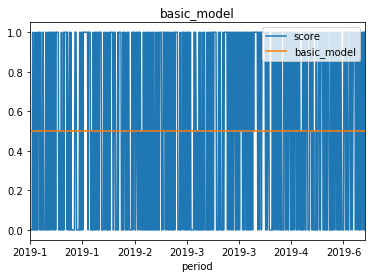

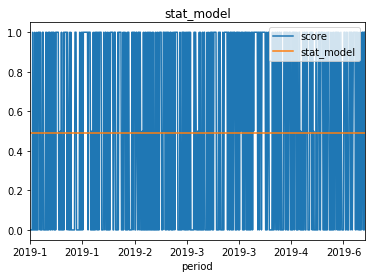

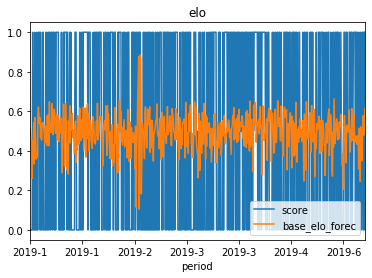

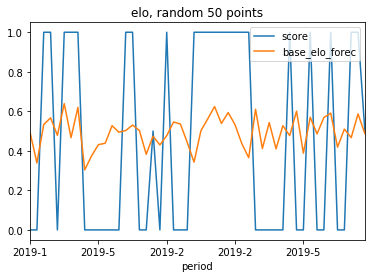

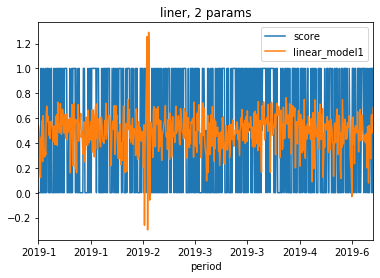

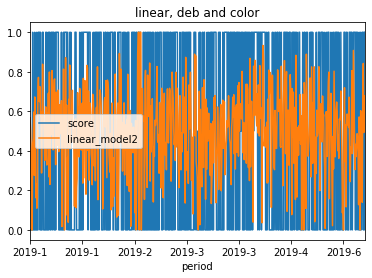

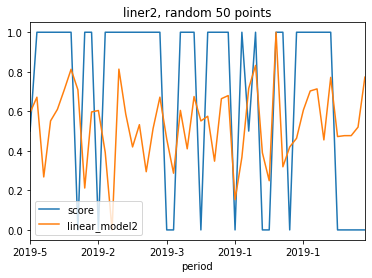

In [13]:
res=test.copy()

basic_model=basic(train, test)
res['basic_model']=basic_model
check(res, 'period', 'score', 'basic_model', 'basic_model')
print(np.sum(res['basic_model']))

stat_model=stat(train, test)
res['stat_model']=stat_model
check(res, 'period', 'score', 'stat_model', 'stat_model')
print(np.sum(res['stat_model']))

check(res, 'period', 'score', 'base_elo_forec', 'elo')
print(np.sum(res['base_elo_forec']))
check(res.sample(50), 'period', 'score', 'base_elo_forec', 'elo, random 50 points')

linear_model1=linear_1(train, test)
res['linear_model1']=linear_model1
check(res, 'period', 'score', 'linear_model1', 'liner, 2 params')
print(np.sum(res['linear_model1']))

linear_model2=linear_2(train, test)
res['linear_model2']=linear_model2
check(res, 'period', 'score', 'linear_model2', 'linear, deb and color')
print(np.sum(res['linear_model2']))
check(res.sample(50), 'period', 'score', 'linear_model2', 'liner2, random 50 points')

In [14]:
res.sample(10)

,rating,opponent_rating,date,score,game,period,base_elo_forec,color_b,color_w,eco_A00,eco_A01,eco_A02,eco_A03,eco_A04,eco_A06,eco_A07,eco_A08,eco_A09,eco_A10,eco_A11,eco_A13,eco_A15,eco_A16,eco_A17,eco_A20,eco_A21,eco_A22,eco_A25,eco_A28,eco_A30,eco_A31,eco_A32,eco_A33,eco_A34,eco_A35,eco_A36,eco_A40,eco_A41,eco_A42,eco_A43,eco_A44,eco_A45,eco_A46,eco_A48,eco_A49,eco_A50,eco_A51,eco_A52,eco_A53,eco_A54,eco_A56,eco_A57,eco_A58,eco_A60,eco_A65,eco_A70,eco_A80,eco_A84,eco_A85,eco_B00,eco_B01,eco_B02,eco_B03,eco_B06,eco_B07,eco_B08,eco_B09,eco_B10,eco_B11,eco_B12,eco_B13,eco_B14,eco_B15,eco_B16,eco_B17,eco_B18,eco_B19,eco_B20,eco_B21,eco_B22,eco_B23,eco_B30,eco_B33,eco_B34,eco_B40,eco_B44,eco_B45,eco_B50,eco_B52,eco_B54,eco_C00,eco_C01,eco_C02,eco_C08,eco_C10,eco_C11,eco_C14,eco_C15,eco_C20,eco_C26,eco_C31,eco_C34,eco_C41,eco_C42,eco_C44,eco_C46,eco_C61,eco_C62,eco_C63,eco_C64,eco_C66,eco_C70,eco_C77,eco_D00,eco_D01,eco_D02,eco_D03,eco_D04,eco_D06,eco_D07,eco_D08,eco_D10,eco_D11,eco_D13,eco_D15,eco_D16,eco_D20,eco_D21,eco_D30,eco_D31,eco_D32,eco_D35,eco_D37,eco_D38,eco_D40,eco_D41,eco_D43,eco_D44,eco_D45,eco_D46,eco_D48,eco_D50,eco_D51,eco_D52,eco_D53,eco_D55,eco_D70,eco_D72,eco_D73,eco_D77,eco_D78,eco_D80,eco_D81,eco_D82,eco_D83,eco_D84,eco_D85,eco_D86,eco_D87,eco_D90,eco_D91,eco_D92,eco_D93,eco_D94,eco_D95,eco_D96,eco_D97,eco_D98,eco_E00,eco_E10,eco_E11,eco_E12,eco_E14,eco_E15,eco_E16,eco_E17,eco_E18,eco_E19,eco_E20,eco_E21,eco_E32,eco_E33,eco_E34,eco_E38,eco_E40,eco_E41,eco_E43,eco_E60,eco_E61,eco_E62,eco_E70,eco_E76,eco_E80,eco_E90,eco_E91,eco_E92,eco_E93,eco_E94,eco_Unknown,basic_model,stat_model,linear_model1,linear_model2
10847,1549,1539,2019-01-09,0.0,1,2019-1,0.514387,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.489943,0.523335,0.486401
10864,1569,1478,2019-01-13,1.0,1,2019-1,0.628045,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.489943,0.708042,0.834370
10947,1560,1608,2019-02-04,0.0,1,2019-2,0.431359,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.489943,0.400797,0.364487
11075,1553,1513,2019-03-04,1.0,1,2019-3,0.557312,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.489943,0.590437,0.679039
11344,1529,1494,2019-05-07,0.0,1,2019-5,0.550199,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.489943,0.570295,0.627037
11401,1524,1599,2019-06-13,

In [15]:
pd.options.display.float_format = '{:,.2f}'.format

In [16]:
train[train['eco_B14']==1]

,rating,opponent_rating,date,score,game,period,base_elo_forec,color_b,color_w,eco_A00,eco_A01,eco_A02,eco_A03,eco_A04,eco_A06,eco_A07,eco_A08,eco_A09,eco_A10,eco_A11,eco_A13,eco_A15,eco_A16,eco_A17,eco_A20,eco_A21,eco_A22,eco_A25,eco_A28,eco_A30,eco_A31,eco_A32,eco_A33,eco_A34,eco_A35,eco_A36,eco_A40,eco_A41,eco_A42,eco_A43,eco_A44,eco_A45,eco_A46,eco_A48,eco_A49,eco_A50,eco_A51,eco_A52,eco_A53,eco_A54,eco_A56,eco_A57,eco_A58,eco_A60,eco_A65,eco_A70,eco_A80,eco_A84,eco_A85,eco_B00,eco_B01,eco_B02,eco_B03,eco_B06,eco_B07,eco_B08,eco_B09,eco_B10,eco_B11,eco_B12,eco_B13,eco_B14,eco_B15,eco_B16,eco_B17,eco_B18,eco_B19,eco_B20,eco_B21,eco_B22,eco_B23,eco_B30,eco_B33,eco_B34,eco_B40,eco_B44,eco_B45,eco_B50,eco_B52,eco_B54,eco_C00,eco_C01,eco_C02,eco_C08,eco_C10,eco_C11,eco_C14,eco_C15,eco_C20,eco_C26,eco_C31,eco_C34,eco_C41,eco_C42,eco_C44,eco_C46,eco_C61,eco_C62,eco_C63,eco_C64,eco_C66,eco_C70,eco_C77,eco_D00,eco_D01,eco_D02,eco_D03,eco_D04,eco_D06,eco_D07,eco_D08,eco_D10,eco_D11,eco_D13,eco_D15,eco_D16,eco_D20,eco_D21,eco_D30,eco_D31,eco_D32,eco_D35,eco_D37,eco_D38,eco_D40,eco_D41,eco_D43,eco_D44,eco_D45,eco_D46,eco_D48,eco_D50,eco_D51,eco_D52,eco_D53,eco_D55,eco_D70,eco_D72,eco_D73,eco_D77,eco_D78,eco_D80,eco_D81,eco_D82,eco_D83,eco_D84,eco_D85,eco_D86,eco_D87,eco_D90,eco_D91,eco_D92,eco_D93,eco_D94,eco_D95,eco_D96,eco_D97,eco_D98,eco_E00,eco_E10,eco_E11,eco_E12,eco_E14,eco_E15,eco_E16,eco_E17,eco_E18,eco_E19,eco_E20,eco_E21,eco_E32,eco_E33,eco_E34,eco_E38,eco_E40,eco_E41,eco_E43,eco_E60,eco_E61,eco_E62,eco_E70,eco_E76,eco_E80,eco_E90,eco_E91,eco_E92,eco_E93,eco_E94,eco_Unknown
532,1505,1485,2013-10-24,1.00,1,2013-10,0.53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1420,1580,1558,2014-01-15,0.00,1,2014-1,0.53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3514,1568,1726,2014-11-03,0.00,1,2014-11,0.29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8625,1539,1605,2017-04-29,1.00,1,2017-4,0.41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8662,1528,1450,2017-05-21,1.00,1,2017-5,0.61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9829,1586,1768,2018-07-16,0.00,1,2018-7,0.26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [17]:
res[abs(res['linear_model2']-res['linear_model1'])>0.2][0:30]

,rating,opponent_rating,date,score,game,period,base_elo_forec,color_b,color_w,eco_A00,eco_A01,eco_A02,eco_A03,eco_A04,eco_A06,eco_A07,eco_A08,eco_A09,eco_A10,eco_A11,eco_A13,eco_A15,eco_A16,eco_A17,eco_A20,eco_A21,eco_A22,eco_A25,eco_A28,eco_A30,eco_A31,eco_A32,eco_A33,eco_A34,eco_A35,eco_A36,eco_A40,eco_A41,eco_A42,eco_A43,eco_A44,eco_A45,eco_A46,eco_A48,eco_A49,eco_A50,eco_A51,eco_A52,eco_A53,eco_A54,eco_A56,eco_A57,eco_A58,eco_A60,eco_A65,eco_A70,eco_A80,eco_A84,eco_A85,eco_B00,eco_B01,eco_B02,eco_B03,eco_B06,eco_B07,eco_B08,eco_B09,eco_B10,eco_B11,eco_B12,eco_B13,eco_B14,eco_B15,eco_B16,eco_B17,eco_B18,eco_B19,eco_B20,eco_B21,eco_B22,eco_B23,eco_B30,eco_B33,eco_B34,eco_B40,eco_B44,eco_B45,eco_B50,eco_B52,eco_B54,eco_C00,eco_C01,eco_C02,eco_C08,eco_C10,eco_C11,eco_C14,eco_C15,eco_C20,eco_C26,eco_C31,eco_C34,eco_C41,eco_C42,eco_C44,eco_C46,eco_C61,eco_C62,eco_C63,eco_C64,eco_C66,eco_C70,eco_C77,eco_D00,eco_D01,eco_D02,eco_D03,eco_D04,eco_D06,eco_D07,eco_D08,eco_D10,eco_D11,eco_D13,eco_D15,eco_D16,eco_D20,eco_D21,eco_D30,eco_D31,eco_D32,eco_D35,eco_D37,eco_D38,eco_D40,eco_D41,eco_D43,eco_D44,eco_D45,eco_D46,eco_D48,eco_D50,eco_D51,eco_D52,eco_D53,eco_D55,eco_D70,eco_D72,eco_D73,eco_D77,eco_D78,eco_D80,eco_D81,eco_D82,eco_D83,eco_D84,eco_D85,eco_D86,eco_D87,eco_D90,eco_D91,eco_D92,eco_D93,eco_D94,eco_D95,eco_D96,eco_D97,eco_D98,eco_E00,eco_E10,eco_E11,eco_E12,eco_E14,eco_E15,eco_E16,eco_E17,eco_E18,eco_E19,eco_E20,eco_E21,eco_E32,eco_E33,eco_E34,eco_E38,eco_E40,eco_E41,eco_E43,eco_E60,eco_E61,eco_E62,eco_E70,eco_E76,eco_E80,eco_E90,eco_E91,eco_E92,eco_E93,eco_E94,eco_Unknown,basic_model,stat_model,linear_model1,linear_model2
10801,1575,1656,2019-01-02,1.00,1,2019-1,0.39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50,0.49,0.33,0.11
10812,1561,1531,2019-01-04,1.00,1,2019-1,0.54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50,0.49,0.57,0.84
10826,1544,1515,2019-01-06,1.00,1,2019-1,0.54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50,0.49,0.56,0.23
10854,1545,1675,2019-01-10,1.00,1,2019-1,0.32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50,0.49,0.22,0.00
10918,1540,1571,2019-01-26,0.00,1,2019-1,0.46,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50,0.49,0.43,0.15
10981,1548,1646,2019-02-13,0.00,1,2019-2,0.36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
df[(df['date']=='2019-01-04')&(df['black.rating']==1561)]

,Unnamed: 0,rules,time_class,time_control,rated,result,date,time,white.username,black.username,white.rating,black.rating,white.result,black.result,white.score,black.score,eco,eco_url,game_url,white_url,black_url,game,period,white_elo_forecast,black_elo_forecast,target_user,score,rating,opponent_rating,base_elo_forec,color,basic
10812,0,chess,blitz,180+2,True,0-1,2019-01-04,18:46:14,saviellyto61,Rosolimo,1531,1561,timeout,win,0.00,1.00,B14,https://www.chess.com/openings/B14-Caro-Kann-Defense-Panov-Attack...5.Nc3-e6-6.Nf3-Nc6,https://www.chess.com/live/game/3349444555,https://api.chess.com/pub/player/saviellyto61,https://api.chess.com/pub/player/rosolimo,1,2019-1,0.46,0.54,Rosolimo,1.00,1561,1531,0.54,b,0.50


In [19]:
# как работает %%time
# структура папок
# потоки

4